In [94]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests
import lxml
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [55]:
!pip install folium

     |████████████████████████████████| 92kB 10.1MB/s eta 0:00:01


In [2]:
txt=requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_Boston').text

In [3]:
soup = BeautifulSoup(txt,'lxml')

In [4]:
art=soup.find('div',class_="mw-parser-output")

In [5]:
cont=art.find('ul')
co=cont.findAll('li')
bor=[]
for c in co:
    bor.append(c.text)
for b in range(len(bor)):
    tem= bor[b].split('(')
    bor[b]=tem[0]
    a=(bor[b].split('/'))
    if(len(a)>1):
        bor.pop(b)
        bor.extend(a)
bor[6]="Dorchester"
bor

['Allston',
 'Back Bay',
 'Bay Village',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway Kenmore ',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West End',
 'West Roxbury',
 'Chinatown',
 'Leather District']

In [6]:
bos=pd.DataFrame({'Neighborhood':bor,'Latitude':0,'Longitude':0})
bos.head()

,Neighborhood,Latitude,Longitude
0,Allston,0,0
1,Back Bay,0,0
2,Bay Village,0,0
3,Beacon Hill,0,0
4,Brighton,0,0


In [7]:
geo=Nominatim()
for i in range(bos.shape[0]):
    
    name=bos.loc[i,'Neighborhood']+",Boston"
    try:
        loc=geo.geocode(name)
        bos.loc[i,'Latitude']=loc.latitude
        bos.loc[i,'Longitude']=loc.longitude
    except:
        print(name)
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


West End,Boston
Chinatown,Boston
Leather District,Boston


In [18]:
bos.loc[19,'Latitude']=42.3647538
bos.loc[19,'Longitude']=-71.0704214
bos.loc[21,'Latitude']=42.3467953
bos.loc[21,'Longitude']=-71.0627214
bos.loc[22,'Latitude']=42.3508734
bos.loc[22,'Longitude']=-71.0592311
bos.loc[7,'Latitude']=42.3556274
bos.loc[7,'Longitude']=-71.0779056

In [19]:
bos.head()

,Neighborhood,Latitude,Longitude
0,Allston,42.355434,-71.132127
1,Back Bay,42.350707,-71.079730
2,Bay Village,42.350011,-71.066948
3,Beacon Hill,42.358708,-71.067829
4,Brighton,42.350097,-71.156442


In [59]:
ma=folium.Map(location=[42.3145186,-71.1103684],zoom_start=12)
for name,lat,lon in zip(bos['Neighborhood'],bos['Latitude'],bos['Longitude']):
    folium.CircleMarker(location=[lat,lon],popup=name,radius=6,color='blue').add_to(ma)
ma

In [27]:
CLIENT_ID='KFLYO0KRSRUTVZMXRYZ1MQHSEHH1GFEANLBCFZCHKE1EK0GN'
CLIENT_SECRET='JONA0JLXBZYB1JCGARW3PJYR4A0UO1NBADVADKVAK5BFGSXL'
ver='20180605'
lat=bos.loc[0,'Latitude']
lon=bos.loc[0,'Longitude']
url="https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&radius=600&limit=100&v={}".format(CLIENT_ID,\
     CLIENT_SECRET,lat,lon,ver)

In [29]:
fil=requests.get(url).json()['response']['groups'][0]['items']
fil

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '530647fd498e4ac184afea7c',
   'name': "Lulu's Allston",
   'location': {'address': '421 Cambridge St',
    'lat': 42.35506753787248,
    'lng': -71.1341073754865,
    'labeledLatLngs': [{'label': 'display',
      'lat': 42.35506753787248,
      'lng': -71.1341073754865}],
    'distance': 167,
    'postalCode': '02134',
    'cc': 'US',
    'city': 'Boston',
    'state': 'MA',
    'country': 'United States',
    'formattedAddress': ['421 Cambridge St',
     'Boston, MA 02134',
     'United States']},
   'categories': [{'id': '52e81612bcbc57f1066b7a00',
     'name': 'Comfort Food Restaurant',
     'pluralName': 'Comfort Food Restaurants',
     'shortName': 'Comfort Food',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 

In [37]:
def return_venues(names,latitude,longitude):
    lis=[]
    for name,lat,lon in zip(names,latitude,longitude):
        print(name)
        url="https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&radius=600&limit=100&v={}".format(\
                                                                                            CLIENT_ID,CLIENT_SECRET,lat,lon,ver)
        results=requests.get(url).json()['response']['groups'][0]['items']
        lis.append([(name,lat,lon,ven['venue']['name']
             ,ven['venue']['location']['lat'],ven['venue']['location']['lng'],ven['venue']['categories'][0]['name']) for ven in results])
    data=pd.DataFrame([item for v in lis for item in v])
    data.columns=['Neighborhood','Latitude','Longitude','Venue','V_Latitude','V_Longitude','Category']
    return data
        

In [38]:
venue=return_venues(bos['Neighborhood'],bos['Latitude'],bos['Longitude'])
venue.head()

Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Dorchester
Downtown
East Boston
Fenway Kenmore 
Hyde Park
Jamaica Plain
Mattapan
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury
Chinatown
Leather District


,Neighborhood,Latitude,Longitude,Venue,V_Latitude,V_Longitude,Category
0,Allston,42.355434,-71.132127,Lulu's Allston,42.355068,-71.134107,Comfort Food Restaurant
1,Allston,42.355434,-71.132127,Kaju Tofu House,42.354329,-71.132374,Korean Restaurant
2,Allston,42.355434,-71.132127,Azama Grill,42.354422,-71.132358,Falafel Restaurant
3,Allston,42.355434,-71.132127,Fish Market Sushi Bar,42.353039,-71.132975,Sushi Restaurant
4,Allston,42.355434,-71.132127,BonChon Chicken,42.353105,-71.130921,Fried Chicken Joint


In [42]:
ven_dum=pd.get_dummies(venue['Category'],prefix="",prefix_sep="")
ven_dum=pd.concat([venue['Neighborhood'],ven_dum],axis=1)
ven_dum.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
ven_group=ven_dum.groupby('Neighborhood',as_index=False).mean()
ven_group.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Allston,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.00,0.020619,...,0.00,0.0,0.020619,0.000000,0.020619,0.0,0.00,0.00,0.000000,0.0
1,Back Bay,0.000000,0.01,0.040000,0.0,0.0,0.01,0.0,0.00,0.000000,...,0.01,0.0,0.000000,0.000000,0.010000,0.0,0.00,0.01,0.000000,0.0
2,Bay Village,0.000000,0.00,0.040000,0.0,0.0,0.00,0.0,0.01,0.040000,...,0.00,0.0,0.020000,0.000000,0.010000,0.0,0.01,0.00,0.010000,0.0
3,Beacon Hill,0.013889,0.00,0.069444,0.0,0.0,0.00,0.0,0.00,0.000000,...,0.00,0.0,0.000000,0.013889,0.000000,0.0,0.00,0.00,0.013889,0.0
4,Brighton,0.000000,0.00,0.020000,0.0,0.0,0.00,0.0,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.02,0.00,0.000000,0.0


In [66]:
def most_freq(row,siz):
    df=row.iloc[1:].sort_values(ascending=False)
    ind=df.index.values[0:siz]
    return ind

In [89]:
col=['Neighborhood']
for i in range(1,11):
    if(i==1):
        col.append("1st most common place")
    elif i==2:
        col.append("2nd most common place")
    elif i==3:
        col.append("3rd most common place")
    else:
        col.append("{}th most common place".format(i))
ven_most=pd.DataFrame(columns=col)
ven_most['Neighborhood']=ven_group['Neighborhood']
for i in range(ven_group.shape[0]):
    ven_most.iloc[i,1:]=most_freq(ven_group.loc[i,:],10)
ven_most.head()

,Neighborhood,1st most common place,2nd most common place,3rd most common place,4th most common place,5th most common place,6th most common place,7th most common place,8th most common place,9th most common place,10th most common place
0,Allston,Korean Restaurant,Pizza Place,Donut Shop,Rock Club,Bakery,Chinese Restaurant,Liquor Store,Sushi Restaurant,Thai Restaurant,Mexican Restaurant
1,Back Bay,Clothing Store,Coffee Shop,Seafood Restaurant,Hotel,American Restaurant,Italian Restaurant,Spa,New American Restaurant,Gym / Fitness Center,Ice Cream Shop
2,Bay Village,Spa,Hotel,Seafood Restaurant,Theater,American Restaurant,Sandwich Place,Chinese Restaurant,Asian Restaurant,Italian Restaurant,Bakery
3,Beacon Hill,American Restaurant,Pizza Place,Italian Restaurant,Mexican Restaurant,French Restaurant,Gift Shop,Restaurant,Cocktail Bar,Café,Hotel Bar
4,Brighton,Pizza Place,Bank,Bakery,Deli / Bodega,Bus Station,Dry Cleaner,Chinese Restaurant,Pub,Sushi Restaurant,Café


In [93]:
ven_group_clus=ven_group.drop(['Neighborhood'],axis=1)
ven_group_clus.head()


,ATM,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.00,0.020619,0.000000,...,0.00,0.0,0.020619,0.000000,0.020619,0.0,0.00,0.00,0.000000,0.0
1,0.000000,0.01,0.040000,0.0,0.0,0.01,0.0,0.00,0.000000,0.010000,...,0.01,0.0,0.000000,0.000000,0.010000,0.0,0.00,0.01,0.000000,0.0
2,0.000000,0.00,0.040000,0.0,0.0,0.00,0.0,0.01,0.040000,0.000000,...,0.00,0.0,0.020000,0.000000,0.010000,0.0,0.01,0.00,0.010000,0.0
3,0.013889,0.00,0.069444,0.0,0.0,0.00,0.0,0.00,0.000000,0.013889,...,0.00,0.0,0.000000,0.013889,0.000000,0.0,0.00,0.00,0.013889,0.0
4,0.000000,0.00,0.020000,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.02,0.00,0.000000,0.0


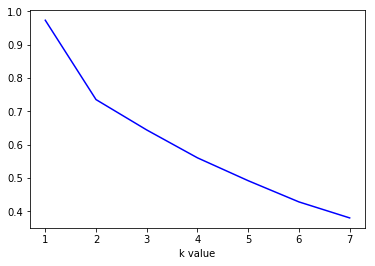

In [125]:
iner=[]
for k in range(1,8):
    km=KMeans(init="k-means++",n_clusters=k,n_init=10).fit(ven_group_clus)
    iner.append(km.inertia_)
plt.plot(list(range(1,8)),iner,color='b')
plt.xlabel("k value")
plt.show()

In [126]:
km=KMeans(init="k-means++",n_clusters=2,n_init=10).fit(ven_group_clus)
labels=km.labels_
#ven_most['Label']=labels
ven_most.insert(1,"Label",labels)
bos.sort_values('Neighborhood',inplace=True)
#bos["Label"]=labels
bos.reset_index(drop=True,inplace=True)
bos.insert(1,"Label",labels)
bos.head()

,Neighborhood,Label,Latitude,Longitude
0,Allston,0,42.355434,-71.132127
1,Back Bay,0,42.350707,-71.079730
2,Bay Village,0,42.350011,-71.066948
3,Beacon Hill,0,42.358708,-71.067829
4,Brighton,0,42.350097,-71.156442


In [127]:
color=['#8A2BE2','#D2391F','#FF8C00']
bos_map=folium.Map(location=[42.3145186,-71.1103684],zoom_start=12)
for name,lat,lon,lab in zip(bos['Neighborhood'],bos['Latitude'],bos['Longitude'],bos['Label']):
    folium.CircleMarker(location=[lat,lon],popup=name,radius=6,color=color[lab],
                       fill_color=color[lab],
                       fill_opacity=0.7).add_to(bos_map)
bos_map


In [128]:
ven_most[ven_most['Label']==0].head()

,Neighborhood,Label,1st most common place,2nd most common place,3rd most common place,4th most common place,5th most common place,6th most common place,7th most common place,8th most common place,9th most common place,10th most common place
0,Allston,0,Korean Restaurant,Pizza Place,Donut Shop,Rock Club,Bakery,Chinese Restaurant,Liquor Store,Sushi Restaurant,Thai Restaurant,Mexican Restaurant
1,Back Bay,0,Clothing Store,Coffee Shop,Seafood Restaurant,Hotel,American Restaurant,Italian Restaurant,Spa,New American Restaurant,Gym / Fitness Center,Ice Cream Shop
2,Bay Village,0,Spa,Hotel,Seafood Restaurant,Theater,American Restaurant,Sandwich Place,Chinese Restaurant,Asian Restaurant,Italian Restaurant,Bakery
3,Beacon Hill,0,American Restaurant,Pizza Place,Italian Restaurant,Mexican Restaurant,French Restaurant,Gift Shop,Restaurant,Cocktail Bar,Café,Hotel Bar
4,Brighton,0,Pizza Place,Bank,Bakery,Deli / Bodega,Bus Station,Dry Cleaner,Chinese Restaurant,Pub,Sushi Restaurant,Café


In [129]:
ven_most[ven_most['Label']==1].head()

,Neighborhood,Label,1st most common place,2nd most common place,3rd most common place,4th most common place,5th most common place,6th most common place,7th most common place,8th most common place,9th most common place,10th most common place
22,West Roxbury,1,Park,Playground,Home Service,Outdoors & Recreation,Zoo Exhibit,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
